# Tidy Data Project

In this project, I work through the process of cleaning and tidying data, using various functions to reshape and transform a dataset into a tidier format. Specifically, I focus on a dataset of medalists from the 2008 Summer Olympics. Once the dataset is tidied, I conduct basic exploratory data analysis.

The tidy data approach is crucial because it provides a structured and standardized way of organizing data, making it easier to clean, analyze, and visualize. Essentially, this approach ensures that the data is clean, consistent, and analysis-ready, helping analyists to reach more accurate, efficient, and insightful results.

## Data Cleaning and Tidying Process

At the start of any data science project, it is important to import all of the required libraries. These libraries provide valuable resources that help analyze and visualize the data.

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below, I read in the relevant dataset (Medalists at the 2008 Olympic Games) and create a dataframe of this dataset using pandas. I then display the first five rows of the dataset using the .head() feature.

In [14]:
# Import and read the dataset, and create a dataframe with the dataset
df_medalists = pd.read_csv("olympics_08_medalists.csv")
df_medalists.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I now begin the process of tidying the dataset. Using the .melt() function, I am able to convert columns into rows. In the melted dataset, each variable becomes a column, and each observation becomes a row. Overall, the .melt() function helps to make the dataset more tidy.

In [15]:
# Use the .melt() function to convert the dataframe columns into rows and 'tidy' the data
df_medalists_tidy = df_medalists.melt(id_vars=['medalist_name'], 
                                      var_name='gender_event', 
                                      value_name='medal')

Using the str.split() function on the gender_event column, I am able to split this single column into two columns, one representing 'gender,' the other 'event'. I then remove the original gender_event column by applying .drop() on the cleaned dataframe.

In [16]:
# Use the .str.split() function to split the 'gender_event' column into two columns, 'gender' and 'event'
df_medalists_tidy[['gender', 'event']] = df_medalists_tidy['gender_event'].str.split('_', expand=True)
df_medalists_tidy.drop(columns=['gender_event'], inplace=True) # Erase the original 'gender_event' column

Before displaying the new, cleaned dataframe, I used the .dropna() function to remove missing (NaN) values from my tidy dataframe. I then use the .head() function to display the first five rows of the new, cleaned dataframe.

In [17]:
# Use the .dropna() function to remove any missing values from the dataframe
df_medalists_tidy.dropna(inplace=True)
df_medalists_tidy.head() # Display the first five rows of the 'tidy' dataframe

,medalist_name,medal,gender,event
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery


## Aggregation Functions and Data Visualizations
In pandas, agregation functions are used to compute summary statistics or perform calculations on a dataframe. 

**For my first aggregate analysis**, I start by creating a new column, 'medal_count,' which will help me aggregate the statistics from the dataframe. Using the .notna() and .astype() functions, I add this new column to my dataframe, where each row gets a 1 if a medal was awarded (i.e., the value in the 'medal' column is not NaN) and a 0 if no medal was awarded (i.e., the value in the 'medal' column is NaN). I then use the pivot_table function to create a pivot table, where I apply the 'sum' function to calculate the total number of each medal awarded.

In [18]:
# Create a new column, 'medal_count'
df_medalists_tidy['medal_count'] = df_medalists_tidy['medal'].notna().astype(int)

# Use the 'sum' function on the 'medal_count' column to calculate the number of medals by type
pivot_table_type = df_medalists_tidy.pivot_table(values='medal_count', index='medal', aggfunc='sum')

# Display the result
pivot_table_type

,medal_count
medal,
bronze,668
gold,586
silver,621


Below is a **pie chart** summarizing the results of this analysis. I chose a pie chart to visualize this insight because it effectively illustrates proportions, offering a quick and intuitive understanding of the medal distribution among medalists. The colors of each category on the pie chart correspond to the color of the respective medal, enhancing the clarity of the visual and making it especially easy to interpret.

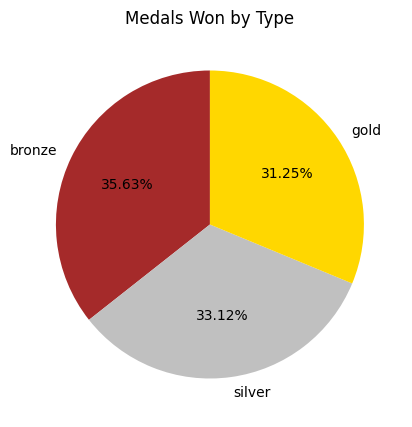

In [19]:
# Calculate how many gold, silver, and bronze medals are represented in the dataframe and store the result as a variable
medal_counts_bytype = df_medalists_tidy['medal'].value_counts()

# Use the medal_counts_bytype variable to create a pie chart
plt.figure(figsize=(5,5)) # Set the size of the pie chart
medal_counts_bytype.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['brown', 'silver', 'gold']) # Adjust chart features such as decimal places and colors 
plt.title('Medals Won by Type')
plt.ylabel('')  # Hide the y-axis label
plt.show() # Display the pie chart

**For my second aggregate analysis**, I again use the 'sum' function to add up the amount of medals awarded by gender. I use the same medal_count column in this analysis as the one created above.

In [20]:
# Use the 'sum' function on the 'medal_count' column to calculate the number of medals by gender
pivot_table_gender = df_medalists_tidy.pivot_table(values='medal_count', index='gender', aggfunc='sum')

# Display the result
pivot_table_gender

,medal_count
gender,
female,843
male,1032


Below is a **pie chart** summarizing the results of this analysis. Similar to the visual in the previous analysis, I chose a pie chart to visualize this insight because it effectively illustrates proportions, offering a quick and intuitive understanding of the gender distribution among medalists.

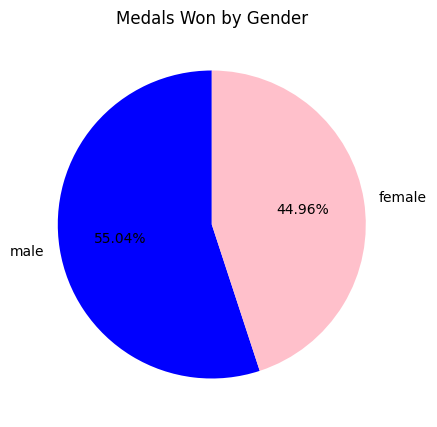

In [21]:
# Calculate how many medals were won by men and by women, and store the result as a variable
medal_counts_bygender = df_medalists_tidy['gender'].value_counts()

# Use the medal_counts_bygender variable to create a pie chart
plt.figure(figsize=(5,5)) # Set the size of the pie chart
medal_counts_bygender.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['blue', 'pink']) # Adjust chart features such as decimal places and colors 
plt.title('Medals Won by Gender')
plt.ylabel('')  # Hide the y-axis label
plt.show() # Display the pie chart

**For my third aggregate analysis**, I use the 'count' function to count the number of medals awarded for each event. Once again, I use the same medal_count column in this analysis as the one created above.

In [22]:
# Use the 'count' function on the 'medal_count' column to count the number of medals by event
pivot_table_event = df_medalists_tidy.pivot_table(values='medal_count', index='event', aggfunc='count')

# Display the result
pivot_table_event

,medal_count
event,
archery,20
artistic gymnastics,49
association football,109
athletics,166
badminton,22
baseball,72
basketball,71
beach volleyball,12
bmx,6


The **column chart** below summarizes the results of this analysis, providing a clear visualization of the amount of medals awarded in each event. This column chart is an effective comparison tool, and the representation highlights the events with both the highest and lowest number of medals awarded: the chart is arranged in descending order, drawing attention to the events at both ends and making them easy to identify. 

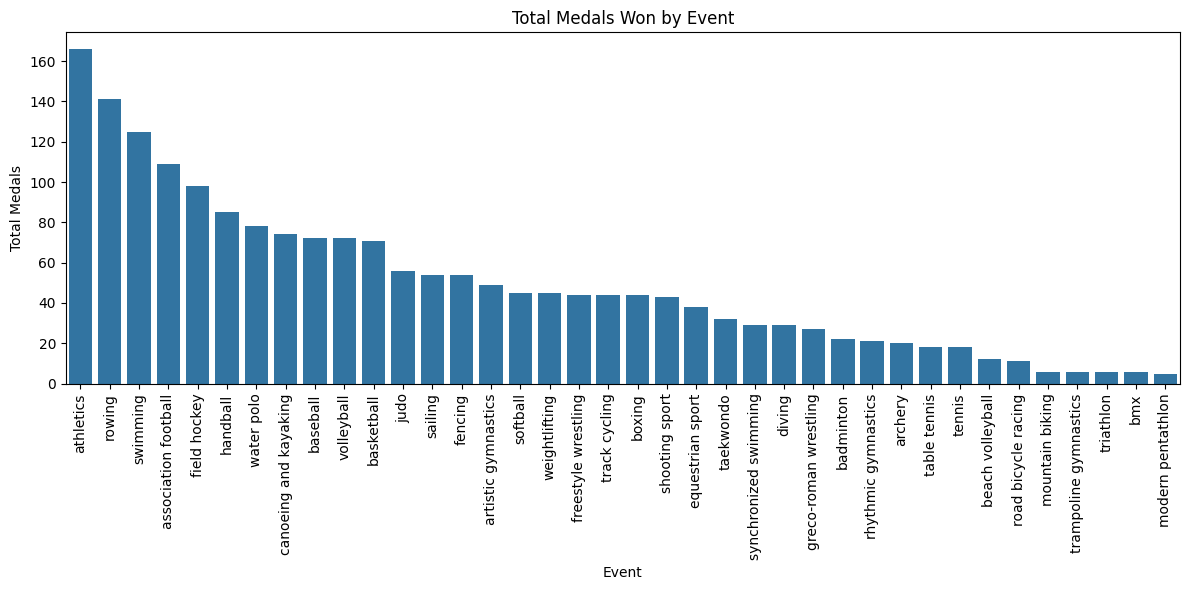

In [26]:
# Calculate how many medals were won per event and store the result as a variable
medals_by_event = df_medalists_tidy.groupby('event')['medal_count'].sum().reset_index()

# Sort the events by the number of medals
medals_by_event = medals_by_event.sort_values(by='medal_count', ascending=False) # The column chart will display values in descending order

# Set up the column chart
plt.figure(figsize=(12, 6))
sns.barplot(x='event', y='medal_count', data=medals_by_event)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add the labels and title
plt.xlabel('Event')
plt.ylabel('Total Medals')
plt.title('Total Medals Won by Event')

# Display the column chart
plt.tight_layout()
plt.show()